# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [2]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [15]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [23]:
data.groupby('children')['children'].agg('count')
data.groupby('children')['debt'].agg('sum')
data.groupby('children')['debt'].mean()# Ваш код будет здесь. Вы можете создавать новые ячейки.

children
0    0.075438
1    0.092346
2    0.094542
3    0.081818
4    0.097561
5    0.000000
Name: debt, dtype: float64

Проверим каким количеством респондентов представлено в датафрейме различное количество детей (от 0 до 5)

In [24]:
data.groupby('children')['children'].agg('count')

children
0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

Бездетных (14091) почти в два раза больше, чем всех других вместе взятых (7240). Это означает, что по этим данным сложно сделать выводы о влиянии количества детей на возврат кредита в срок.

Проверим, как часто респонденты с разной категорией детности в среднем не возвращают кредит в срок

In [25]:
data.groupby('children')['debt'].mean()

children
0    0.075438
1    0.092346
2    0.094542
3    0.081818
4    0.097561
5    0.000000
Name: debt, dtype: float64

Линейной зависимости не наблюдается. Доля респондентов не вернувших кредит в срок с количеством детей от 0 до 2-х включительно - растет. Однако эта доля для респондентов с 3 детьми, меньше чем 1, 2-я и 4-я детьми. С 4-я детьми эта доля больше чем в прочих категориях, однако все из 5-и представленных в датафрейме респондентов с 5-ю детьми вернули кредит вовремя.

Укрупним категории детности, повысив тем самым количество респондентов которым они представлены. И снова проверим.

In [26]:
# функция перекатегоризации количества детей

def categorize_children(children):
    try:
        if  children < 1:
            return 'бездетные'
        elif 1 <= children <= 3:
            return 'с детьми'
        elif children >= 4:
            return 'многодетные'
    except:
        pass

# добавление переменной с категориями детности в датасет

data['children_category'] = data['children'].apply(categorize_children)

# среднее количество респондентов не вернувших кредит в срок по категориям детности

data.groupby('children_category')['debt'].mean()

children_category
бездетные      0.075438
многодетные    0.080000
с детьми       0.092490
Name: debt, dtype: float64

Линейной зависимости также не наблюдается. Доля респондентов с детьми не вернувших кредит в срок (0.092) больше чем и у бездетных (0.075), и у многодетных (более 3-х детей) респондентов (0.08).  

In [27]:
# функция перекатегоризации-2 количества детей: бездетные vs с детьми

def categorize_children2(children):
    try:
        if  children < 1:
            return 'бездетные'
        else:
            return 'с детьми'
        
    except:
        pass

# добавление переменной с категориями-2 детности в датасет
    
data['children_category2'] = data['children'].apply(categorize_children2)

# среднее количество респондентов не вернувших кредит в срок по категориям детности

data.groupby('children_category2')['debt'].mean()

children_category2
бездетные    0.075438
с детьми     0.092403
Name: debt, dtype: float64

Разделение всех респондентов на бездетных и с детьми показывает, что в среднем бездетные респонденты чаще возвращают кредиты в срок. Однако является ли различие средних статистически значимым, учитывая разную представленность респондентов с детьми (7240) и бездетных респондентов (14091) - не ясно. 

**Вывод: линейной зависимости между количеством детей и возвратом кредита в срок не выявлено. В среднем бездетные респонденты несколько чаще возвращают кредиты в срок, чем респонденты с детьми. Статистическая значимость этого различия не проверена.** 


#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [28]:
print(data['family_status'].unique()) # уникальные значения переменной 'family_status'

data.groupby('family_status')['family_status'].agg('count') # каким количеством респондентов представлено каждое из семейных положений

data.groupby('family_status')['debt'].mean() # Среднее по семейным положениям.

['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']


family_status
Не женат / не замужем    0.097639
в разводе                0.070648
вдовец / вдова           0.066246
гражданский брак         0.093130
женат / замужем          0.075606
Name: debt, dtype: float64

Семейное положение 'женат / замужем' (12261) представлено в датафрейме шире и превашает все другие категории вместевзятые(9070). Необходимо укрупнить категории семейного положения: "в браке" vs "не в браке". Не ясно к какой из этих категорий следует относить "гражданский брак". Следует проверить 3 варианта: к 1-й, ко 2-й, ни к какой.

In [29]:
# функция перекатегоризации1: 'гражданский брак' = 'в браке'
def categorize_family1(family_status):
    try:
        if 'Не женат' in family_status or 'в разводе' in family_status or 'вдовец' in family_status:
            return 'не в браке'
        else:
            return 'в браке'
    
    except:
        return 'нет категории'

# применение функции
data['family1'] = data['family_status'].apply(categorize_family1)

data.groupby('family1')['debt'].mean() # средние

family1
в браке       0.080024
не в браке    0.085089
Name: debt, dtype: float64

In [30]:
data.groupby('family1')['family1'].count() # сколько респондентов считаются состоящими и не состоящими в браке, если 'гражданский брак' = 'в браке'

family1
в браке       16395
не в браке     4936
Name: family1, dtype: int64

Если гражданский брак отождествлять с официальным, то в среднем респонденты состоящие в браке несколько чаще возвращают кредит в срок. Однако является ли различие средних статистически значимым, уситывая разную представленность респондентов состоящих (16395) и не состоящих в браке (4936) - не ясно.  

In [31]:
# функция перекатегоризации2: 'гражданский брак' = 'не в браке'
def categorize_family2(family_status):
    try:
        if 'Не женат' in family_status or 'в разводе' in family_status or 'вдовец' in family_status or 'гражданский' in family_status:
            return 'не в браке'
        else:
            return 'в браке'
    
    except:
        return 'нет категории'

# применение функции
data['family2'] = data['family_status'].apply(categorize_family2)

data.groupby('family2')['debt'].mean() # средние

family2
в браке       0.075606
не в браке    0.088754
Name: debt, dtype: float64

In [32]:
data.groupby('family2')['family2'].count() # сколько респондентов считаются состоящими и не состоящими в браке, если 'гражданский брак' = 'не в браке'

family2
в браке       12261
не в браке     9070
Name: family2, dtype: int64

Если не отождествлять гражданский брак с официальным, то в среднем респонденты состоящие в браке чаще возвращают кредит в срок (в т.ч. чаще, чем в первом случае). Однако является ли различие средних статистически значимым, уситывая разную представленность респондентов состоящих (12261) и не состоящих в браке (9070) - не ясно. (В этом случае значимости больше, т.к. представленность различается гораздо меньше, чем в предыдущем). 

In [33]:
# функция перекатегоризации3: 'гражданский брак' = 'гражданский брак'
def categorize_family3(family_status):
    try:
        if 'Не женат' in family_status or 'в разводе' in family_status or 'вдовец' in family_status:
            return 'не в браке'
        elif 'граждан' in family_status:
            return 'в гражданском браке'
        else:
            return 'в браке'
    
    except:
        return 'нет категории'

# применение функции
data['family3'] = data['family_status'].apply(categorize_family3)

data.groupby('family3')['debt'].mean() # средние

family3
в браке                0.075606
в гражданском браке    0.093130
не в браке             0.085089
Name: debt, dtype: float64

Если выносить гражданский брак в отдельную категорию, то в среднем респонденты состоящие в браке чаще возвращают кредит в срок.  

**Вывод: в среднем респонденты состоящие в браке чаще возвращают кредит в срок, чем респонденты не состоящие в браке. Это различие более заметно, если не отождествлять гражданский брак с официальным. Статистическая значимость различия не проверена.** 

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [34]:
data.groupby('total_income_category')['total_income_category'].count() # представленность категорий дохода в датафрейме

total_income_category
A       25
B     5014
C    15921
D      349
E       22
Name: total_income_category, dtype: int64

In [35]:
data.groupby('total_income_category')['debt'].mean() # среднее по категориям дохода

total_income_category
A    0.080000
B    0.070602
C    0.084982
D    0.060172
E    0.090909
Name: debt, dtype: float64

**Вывод: Линейной зависимости между уровнем дохода и возвратом кредита в срок не выявлено.** 

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [36]:
data.groupby('purpose_category')['purpose_category'].count()# 

purpose_category
операции с автомобилем       4279
операции с недвижимостью    10751
получение образования        3988
проведение свадьбы           2313
Name: purpose_category, dtype: int64

In [37]:
data.groupby('purpose_category')['debt'].mean()# средние по группм дохода

purpose_category
операции с автомобилем      0.093480
операции с недвижимостью    0.072551
получение образования       0.092528
проведение свадьбы          0.079118
Name: debt, dtype: float64

**Вывод:в среднем кредиты на проведение свадьб и операции с недвижимостью чаще возвращают в срок, чем на операции с автомобилем и получение образование. Статистическая значимость различий средних не проверена.** 

In [71]:
data_pivot = data.pivot_table(index=['purpose_category'], columns='total_income_category', values='debt', aggfunc='mean')
data_pivot

total_income_category,A,B,C,D,E
purpose_category,,,,,
операции с автомобилем,0.000000,0.083170,0.095882,0.138889,0.000000
операции с недвижимостью,0.058824,0.067240,0.074903,0.035714,0.181818
получение образования,0.250000,0.077528,0.098540,0.026667,0.000000
проведение свадьбы,0.000000,0.051471,0.087912,0.088235,0.000000


Построенная выше таблица сопряженности показывает, что респонденты с доходом более 1000000 (категория А) в среднем очень часто не возвращают в срок кредиты на получение образования, а респонденты с доходом менее 30000 (категория Е) в среднем очень часто не возвращают в срок кредиты на операции с недвижимостью (ни на что кроме этого такие респонденты кредитов не берут). Примечательно, что респонденты с наибольшими и наименьшими доходами (А и Е, соответственно) не берут кредитов на операции с автомобилями, а прочие категории респондентов (B,C,D) сравнительно часто не возвращают их в срок, причему чем ниже доходы, тем чаще: B (0.083), C(0.0959), D(0.139). Похожая, хотя и менее ярко выраженная тенденция с кредитами на проведение свадеб.  

In [72]:
data_pivot1 = data.pivot_table(index=['purpose_category'], columns='total_income_category', values='debt', aggfunc='count')
data_pivot1

total_income_category,A,B,C,D,E
purpose_category,,,,,
операции с автомобилем,2,1022,3181,72,2
операции с недвижимостью,17,2558,7997,168,11
получение образования,4,890,3014,75,5
проведение свадьбы,2,544,1729,34,4


Как показывает подсчет значений, которыми представлены данные о средних в таблице сопряженности выше, выводы едва ли статистически значимы.

Объединим все условия второй части Практикума 2 в одной таблице сопряженности:

In [42]:
data_pivot2 = data.pivot_table(index=['purpose_category'], columns=['total_income_category','family2','children_category2',], values='debt', aggfunc='count')
print(data_pivot2)

total_income_category            A                                      B  \
family2                    в браке          не в браке            в браке   
children_category2       бездетные с детьми  бездетные с детьми бездетные   
purpose_category                                                            
операции с автомобилем         NaN      1.0        NaN      1.0     388.0   
операции с недвижимостью       6.0      5.0        3.0      3.0     999.0   
получение образования          1.0      1.0        1.0      1.0     362.0   
проведение свадьбы             NaN      NaN        1.0      1.0       NaN   

total_income_category                                         C           \
family2                           не в браке            в браке            
children_category2       с детьми  бездетные с детьми бездетные с детьми   
purpose_category                                                           
операции с автомобилем      286.0      264.0     84.0    1231.0    760.0   
опе

В датасете больше всего информации о кредитах респондентов со средним доходом (от 50000 до 200000 - категория С) на недвижимость. Примечательно что респонденты с таким доходом без детей в браке или не в браке берут больше кредитов на недвижимость, чем респонденты с детьми в браке или не в браке на недвижимость (с детьми и в браке сопоставимы без детей и не в браке). Количество кредитов респондентов со средним доходов с детьми и в браке на автомобиль и образование сопоставимо с количеством кредитов на те же цели у респондентов той же категории доходов, но без детей и не в браке. ("Некоторые женятся, а некоторые так").

Безусловно радует и повышает доверие к данным то, что никто из респондентов состоящих в браке не брал кредитов на проведение свадеб.  

Посмотрим каким респондентам и на какие цели согласно данным не стоит давать кредиты, если необходимо, чтобы они вернули их в срок.

In [43]:
data_pivot3 = data.pivot_table(index=['total_income_category','family2','children_category2'], columns=['purpose_category'], values='debt', aggfunc='mean')
print(data_pivot3)

purpose_category                                     операции с автомобилем  \
total_income_category family2    children_category2                           
A                     в браке    бездетные                              NaN   
                                 с детьми                          0.000000   
                      не в браке бездетные                              NaN   
                                 с детьми                          0.000000   
B                     в браке    бездетные                         0.077320   
                                 с детьми                          0.087413   
                      не в браке бездетные                         0.079545   
                                 с детьми                          0.107143   
C                     в браке    бездетные                         0.069862   
                                 с детьми                          0.102632   
                      не в браке бездетные          

Вовремя кредит на операции с автомобилем в среднем чаще не вернут респонденты категории дохода D c с детьми, состоящие в браке или нет.
Вовремя кредит на операции с недвижимостью в среднем чаще не вернут респонденты респонденты категории дохода E бездетные в браке, категории А с детьми и в браке, категории В с детьми и не в браке, категории В с детьми и не в браке.
Вовремя кредит на образование в среднем чаще не вернут респонденты респонденты категории дохода А бездетные и не состоящие в браке (всего один респ. поэтому в 100% не вернут=)), категории дохода С с детьми и не в браке.
Вовремя кредит на проведение свадьбы в среднем чаще не вернут респонденты категории дохода С и D с детьми и не в браке.


<AxesSubplot:xlabel='purpose_category', ylabel='total_income_category-family2-children_category2'>

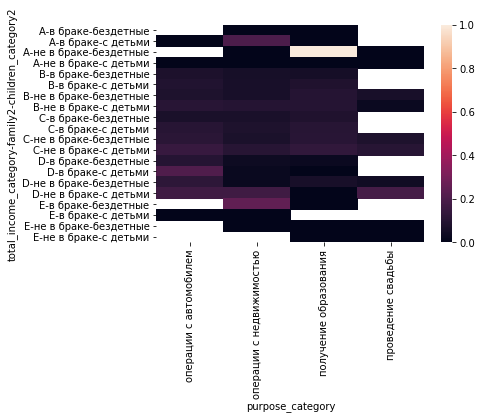

In [70]:
import seaborn as sns
sns.heatmap(data_pivot3)

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

In [37]:
data.groupby('income_type')['income_type'].count() # сколькими респондентами в датафрейме представлены разные категории источников доходов

income_type
безработный            2
в декрете              1
госслужащий         1451
компаньон           5047
пенсионер           3812
предприниматель        2
сотрудник          11015
студент                1
Name: income_type, dtype: int64

*Пропуски есть в переменных/столбцах days_employed и total_income. Известно также, что датафрейме есть безработные (2), пенсионеры (3812), студент (1), в декрете (1). Возможно, они не указывали свой ежемесячные доход (в total_income 2174 пропущенных значения), считая, что у них нет трудовых доходов. Примечательно, что количество пропуском в days_employed и total_income - совпадают, возможно, те, кто не указывали общий трудовой стаж не указывали и total_income (например в строке 12).* 

*Респонденты участвующие в социологических опросах склонны скрвать свои доходы. Иногда для их определения используют косвенные шкалы эквивалентности: "не хватает на еду и одежду", "хватает на еду и одежду, но не на покупку бытовой техники", "хватает на покупку бытовой техники, но не более крупные покупки" и т.д. (A, B, C, C+, CC+).* 
Часть респондентов может не знать своего общего трудового стажа в днях (с точностью до дня), возможно примерный в годах. Это могут объясняться пропуски в days_employed. 

*Однако, судя по всему, источником данных датафрейма data являются не опросные данные, а данные, запрашиваетмы банками у ПФР и ФНС.* 

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Для количественных переменных пропуски в данных лучше заполнять медианными значениями, чтобы исключить влияние отдельных выбросов - одиночных или малочисленных очень больших или очень малых значений по сравнению со средним.*

*Например, в компании работают 10 сотрудников. Зарплата одного 1000000, а остальных 9 - по 20000. Средняя зарплата в фирме 118000, а медианная - 20000. Очевидно, что вторая метрика точнее отражает доход среднестатистического сотрудника компании. Соответственно, если в данных о компании у одного из сотрудников пропущены данные о доходе, замена их медианным, а не средним будет меньше искажать картину и меньше скажется на рассчитываемых далее статистиках.*

### Шаг 4: общий вывод.

**В среднем бездетные респонденты чаще возвращают кредиты в срок, чем респонденты с детьми. Линейной зависимости между количеством детей и возвратом кредита в срок не выявлено.**

**В среднем респонденты состоящие в браке чаще возвращают кредиты в срок, чем респонденты не состоящие в браке. Это различие более заметно, если не отождествлять гражданский брак с официальным.**

**Линейной зависимости между уровнем дохода и возвратом кредитов в срок не выявлено.**

**В среднем кредиты на проведение свадьб и операции с недвижимостью чаще возвращают в срок, чем на операции с автомобилем и получение образование.**

**Статистическая значимость различий всех из указанных выше средних не проверена.**



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения. Также можно расписать все, что было сделано в ходе проведения работы. 

</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Ты проделал большую работу, молодец! Ты овладел важными на данном этапе обучения инструментами, а также довольно качественно их используешь. Критических замечаний немного. Мне важно убедиться в том, что метод сводных таблиц тобой освоен. Жду твою работу :)

</div>